
VISÃO GERAL DOS DADOS:
                 Entity Code  Year  Major depression
0  Andean Latin America  NaN  2008               0.0
1          Asia Pacific  NaN  2008              80.8
2           Australasia  NaN  2008             100.0
3             Caribbean  NaN  2008               9.1
4          Central Asia  NaN  2008               0.0

INFORMAÇÕES BÁSICAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            22 non-null     object 
 1   Code              1 non-null      object 
 2   Year              22 non-null     int64  
 3   Major depression  22 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 836.0+ bytes
None

VALORES FALTANTES:
Entity               0
Code                21
Year                 0
Major depression     0
dtype: int64

RANKING DE PREVALÊNCIA:
                         Entit

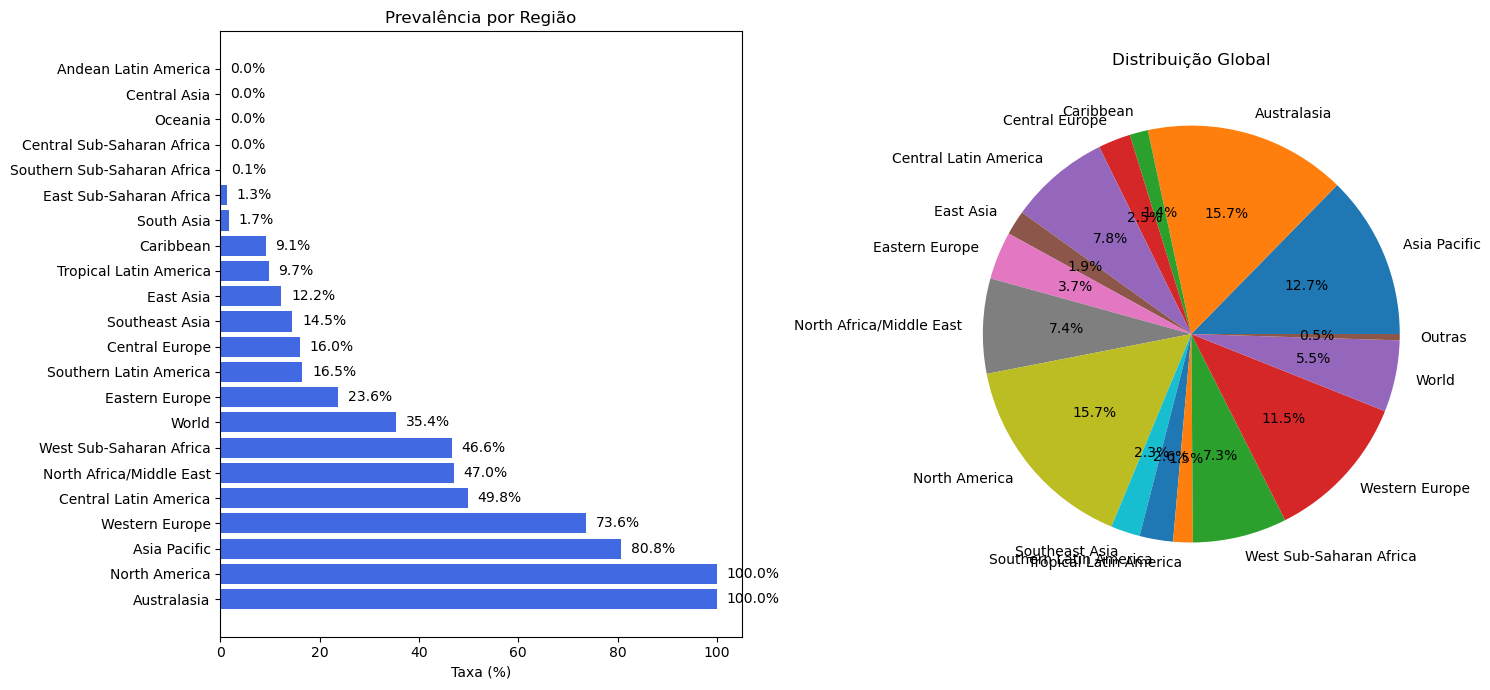


MÉDIA MUNDIAL: 35.4%


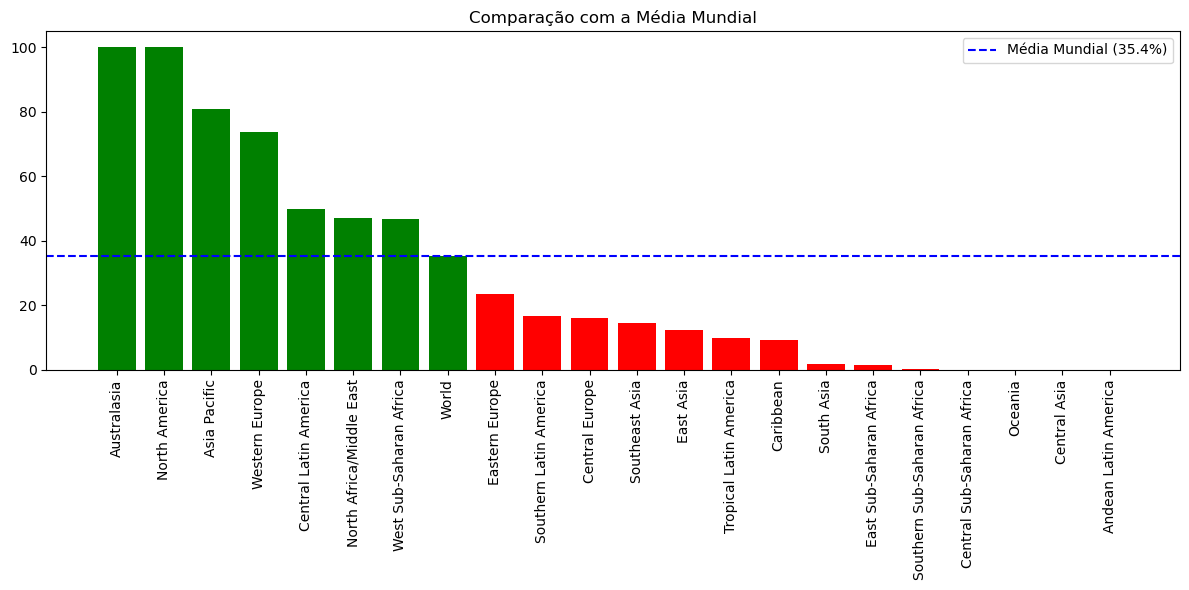

In [8]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# 1. CARREGAR OS DADOS
# Lê o arquivo CSV com os dados de prevalência de depressão
caminho_arquivo = 'C:/Users/Rossi/Downloads/Trabalho Projeto 3/3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv'
dados = pd.read_csv(caminho_arquivo)

# 2. EXPLORAR OS DADOS
print("\nVISÃO GERAL DOS DADOS:")
print(dados.head())  # Mostra as primeiras linhas

print("\nINFORMAÇÕES BÁSICAS:")
print(dados.info())  # Mostra tipos de dados e valores não nulos

# 3. LIMPEZA DOS DADOS
print("\nVALORES FALTANTES:")
print(dados.isnull().sum())  # Conta valores nulos em cada coluna

# 4. ANÁLISE INICIAL
# Ordena regiões por taxa de depressão (maior para menor)
dados_ordenados = dados.sort_values('Major depression', ascending=False)

print("\nRANKING DE PREVALÊNCIA:")
print(dados_ordenados[['Entity', 'Major depression']])

# 5. VISUALIZAÇÃO DOS DADOS
plt.figure(figsize=(15, 7))

# Gráfico 1: Barras horizontais com as taxas por região
plt.subplot(1, 2, 1)
barras = plt.barh(dados_ordenados['Entity'], dados_ordenados['Major depression'], color='royalblue')
plt.title('Prevalência por Região')
plt.xlabel('Taxa (%)')

# Adiciona os valores nas barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 2, barra.get_y() + barra.get_height()/2, f'{largura:.1f}%', 
             va='center', color='black')

# Gráfico 2: Pizza com as principais regiões
plt.subplot(1, 2, 2)
principais = dados[dados['Major depression'] > 5]  # Filtra regiões com taxa > 5%
outras = dados[dados['Major depression'] <= 5]['Major depression'].sum()  # Soma as demais

# Combina os dados usando concat (forma moderna)
todos = pd.concat([principais, pd.DataFrame({'Entity':['Outras'], 'Major depression':[outras]})])

plt.pie(todos['Major depression'], labels=todos['Entity'], autopct='%1.1f%%')
plt.title('Distribuição Global')

plt.tight_layout()
plt.show()

# 6. COMPARAÇÃO COM A MÉDIA MUNDIAL
media_mundial = dados[dados['Entity'] == 'World']['Major depression'].values[0]
print(f"\nMÉDIA MUNDIAL: {media_mundial}%")

# 7. GRÁFICO COMPARATIVO
plt.figure(figsize=(12, 6))
cores = ['green' if taxa >= media_mundial else 'red' for taxa in dados_ordenados['Major depression']]
plt.bar(dados_ordenados['Entity'], dados_ordenados['Major depression'], color=cores)
plt.axhline(media_mundial, color='blue', linestyle='--', label=f'Média Mundial ({media_mundial}%)')
plt.title('Comparação com a Média Mundial')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()